<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/Semana_05_Tema_01_Pandas_funciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos a levantar un dataset de [fake news en español]
- fake news en español (https://www.kaggle.com/datasets/guillermoezquer/fakenews-espaol)
- reviews tripadvisor en español e inglés (https://www.kaggle.com/datasets/mmaguero/la-mision-hotel-boutiqueasuncionpyges)

In [ ]:
from google.colab import drive
import numpy as np
from pandas import DataFrame, read_csv, to_datetime
import pandas as pd


In [ ]:
drive.mount("/content/drive")
!pip install kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_kaggle = "mmaguero/la-mision-hotel-boutiqueasuncionpyges"
folder_dataset = f"/content/drive/MyDrive/kaggle/datasets/{dataset_kaggle.split('/')[1]}"
!mkdir -p {folder_dataset}
!kaggle datasets download --unzip -d {dataset_kaggle} --p {folder_dataset}
!ls {folder_dataset}

  0% 0.00/94.9k [00:00<?, ?B/s]
100% 94.9k/94.9k [00:00<00:00, 9.50MB/s]
La_Mision_Hotel_Boutique-Asuncion__es.csv


In [ ]:
# leemos el dataset y mostramos la cabecera
df = read_csv(f"{folder_dataset}/La_Mision_Hotel_Boutique-Asuncion__es.csv", delimiter=",")
df.head()

,review_body,review_date,rating
0,"Elija cualquiera de sus opciones, standard o e...","January 11, 2019",5
1,El nivel de atencion del personal y calidad de...,"September 21, 2018",5
2,muy buena ubicación con una arquitectura agrad...,"January 11, 2019",5
3,"Raúl un verdadero metre del desayuno, lo mejor...","January 11, 2019",5
4,Un excelente hotel la misión en Asuncion Muy l...,"January 6, 2019",5


## Aplicando funciones

Sirve para aplicar funciones a las columnas.
Al leer la descripción del dataset podemos ver que existen reviews que están en inglés, una forma sencilla para detectarlas sería buscando las palabras `the`, `is`, `are`.

## Apply

Aplica una función sobre una fila o una columna del DataFrame. Trabaja con el argumento axis donde por defecto trabaja por columnas (axis=0).

En caso de no aplicarlo sobre una Serie se aplica sobre todo el DataFrame produciendo un nuevo DataFrame o Series.

### Desde una función lambda

Para buscar vamos a aplicar una función lambda a toda la columna "review_body" y crearemos una columna llamada "ingles" la cual va a ser True si se encuentra una de la palabra `are`

In [ ]:

df["ingles"] = df["review_body"].apply(lambda celda:
                                       True if celda.lower().find(" are ") >= 0  else False)

print('Sentencia: df["review_body"].apply(lambda celda: \n' \
                                      ' True if celda.lower().find(" are ") >= 0 \\ \n' \
                                      ' or celda.find(" are ") >= 0 else False)')
print()
print("Mostramos las 10 primeras filas de comentarios en inglés:\n", df[df["ingles"] == True].head(10))

Sentencia: df["review_body"].apply(lambda celda: 
 True if celda.lower().find(" are ") >= 0 \ 
 or celda.find(" are ") >= 0 else False)

Mostramos las 10 primeras filas de comentarios en inglés:
                                            review_body         review_date  \
570  Great hotel in Asuncion. Beautifull rooms, sta...       July 26, 2017   
571  I enjoyed my stay at La Mision very much. I wa...       June 26, 2017   
572  It is a quite Hotel and has the style of an ol...        June 8, 2017   
576  This beautiful well decorated hotel is a parad...        May 17, 2017   
580  I have stayed here twice now on business and i...      March 16, 2017   
582  I just read that this hotel made # 22 on trip ...    January 17, 2017   
584  Its a nice Hotel that worth staying at when co...   November 23, 2016   
585  Clean. Large place. Great area. Good price. No...   November 17, 2016   
586  Very nice hotel. Excellent service. Personnel ...   November 14, 2016   
589  This hotel is lovel

### Desde una función

Para buscar vamos a llamar a una función "en_espaniol" sobre toda la columna "review_body" y crearemos una columna llamada "espaniol" la cual va a ser True si NO se encuentra la palabra `are`

In [ ]:
def en_espaniol(celda: str) -> bool:
  """ Verifica si la review es en español.

  Args:
    celda (str): Recibe el valor de la celda que estoy iterando en este momento.

  Returns:
    bool: Retorna True si la review es en español, en caso contrario devuelve False.
  """
  if celda.lower().find(" are ") >= 0:
    return False
  else:
    return True

df["espaniol"] = df["review_body"].apply(en_espaniol)

print('Sentencia: df["review_body"].apply(en_espaniol)')
print()
print("Mostramos las 10 primeras filas de comentarios en español:\n", df[df["espaniol"] == True].head(10))

Sentencia: df["review_body"].apply(en_espaniol)

Mostramos las 10 primeras filas de comentarios en español:
                                          review_body         review_date  \
0  Elija cualquiera de sus opciones, standard o e...    January 11, 2019   
1  El nivel de atencion del personal y calidad de...  September 21, 2018   
2  muy buena ubicación con una arquitectura agrad...    January 11, 2019   
3  Raúl un verdadero metre del desayuno, lo mejor...    January 11, 2019   
4  Un excelente hotel la misión en Asuncion Muy l...     January 6, 2019   
5  La pileta tenia un color medio verde, como si ...   December 27, 2018   
6  Todo excelente, el servicio muy bueno y la ate...   December 18, 2018   
7  Increibles instalaciones, las utilizamos para ...   December 13, 2018   
8  La ubicación, instalaciones, amabilidad y cord...    December 9, 2018   
9  Hotel premium, servicio premium, con detalles ...    December 3, 2018   

   rating  ingles  espaniol  
0       5   False      T

### Desde una función con parámetros

Para buscar vamos a llamar a una función "en_ingles_parametros" sobre toda la columna "review_body" y crearemos una columna llamada "espaniol_parametros" la cual va a ser True si se encuentra una de las siguientes palabra `the`, `is`, `are` o un grupo de palabras ingresadas a mano.

Podemos verificar que hay review en inglés que están etiquetadas de forma incorrecta.

Para el ingreso de palabras vamos a utilizar un formulario y se ingresaran palabras separadas por coma.

In [ ]:
# mostramos la primer fila donde la columna "ingles" es False pero vemos
# que está escrita en inglés. Esto de debe a que no seleccionamos
# todas las palabras corretas
for i in range(0, df.shape[0]):
  if df.loc[i]["review_body"].lower().find(" the ") >= 0 \
    and not df.loc[i]["ingles"]:
    print("Muestro la fila: \n", df.loc[i])
    print()
    print("Muestro la review completa: \n", df.loc[i]["review_body"])
    break

Muestro la fila: 
 review_body    This is a unique and welcoming boutique hotel....
review_date                                       August 2, 2017
rating                                                         5
ingles                                                     False
espaniol                                                    True
Name: 569, dtype: object

Muestro la review completa: 
 This is a unique and welcoming boutique hotel. The staff is warm and professional. The food at the restaurant is great The location is convenient for walking around Villa Mora and other local neighborhoods. I can't recommend it highly enough!


In [ ]:
#@title Ingreso de palabras en inglés
#@markdown Vamos a probar agregando las palabras "the" e "is".

ingles_parametros = "the, is" #@param {"type": "string"}

In [ ]:
# Vamos a scribir la función "en_espaniol_parametros" y luego recalculamos la
# columna "espaniol"

def en_espaniol_parametros(celda: str, nuevas_palabras_ingles: list) -> bool:
  """ Verifica si la review es en español.

  Args:
    celda (str): Recibe el valor de la celda que estoy iterando en este momento.
    nuevas_palabras_ingles (list): Lista de palabras en inglés que debo chequear
      si se encuentra dentro de la celda.

  Returns:
    bool: Retorna True si la review es en español, en caso contrario devuelve False.
  """
  celda_tmp = celda.lower()
  if celda_tmp.find(" are ") >= 0:
    return False
  if nuevas_palabras_ingles and len(nuevas_palabras_ingles) > 0:
    for palabra in nuevas_palabras_ingles:
      if celda_tmp.find(palabra) >= 0:
        # se encontro una palabra en inglés dentro del texto, por lo tanto
        # lo marco como que no está es español
        return False
  return True

nuevas_palabras_ingles = [palabra.lower().strip() for palabra in ingles_parametros.split(',')]
df["espaniol_parametros"] = df["review_body"].apply(en_espaniol_parametros, args=(nuevas_palabras_ingles,))

print('Sentencia: df["review_body"].apply(en_espaniol_parametros, args=(nuevas_palabras_ingles,))')
print()
print("Mostramos las 10 primeras filas de comentarios en español:\n", df[df["espaniol_parametros"] == True].head(10))

Sentencia: df["review_body"].apply(en_espaniol_parametros, args=(nuevas_palabras_ingles,))

Mostramos las 10 primeras filas de comentarios en español:
                                           review_body        review_date  \
2   muy buena ubicación con una arquitectura agrad...   January 11, 2019   
6   Todo excelente, el servicio muy bueno y la ate...  December 18, 2018   
7   Increibles instalaciones, las utilizamos para ...  December 13, 2018   
9   Hotel premium, servicio premium, con detalles ...   December 3, 2018   
10  El Hotel es muy bueno, como qualquer otro cinc...  November 14, 2018   
11  todo muy bueno, ubicación, decoración, atenció...   November 9, 2018   
12  Muy recomendable, las habitaciones que dan al ...   November 4, 2018   
13  Es un hotel excelente, sus instalaciones son m...   October 15, 2018   
14  Es un gran hotel, cálido, confortable, la mejo...   October 14, 2018   
15  Se debería proteger mejor el estacionamiento. ...   October 12, 2018   

    rating 

In [ ]:
# verificamos que no hay filas que tengan la columna "espaniol" en True y que posea
# las palabras "the", "is" o "are"
for i in range(0, df.shape[0]):
  if (df.loc[i]["review_body"].lower().find(" the ") >= 0 \
    or df.loc[i]["review_body"].lower().find(" is ") >= 0 \
    or df.loc[i]["review_body"].lower().find(" are ") >= 0) \
    and df.loc[i]["espaniol"]:
    print("Muestro la fila: \n", df.loc[i])
    print()
    print("Muestro la review completa: \n", df.loc[i]["review_body"])
    break

Muestro la fila: 
 review_body            This is a unique and welcoming boutique hotel....
review_date                                               August 2, 2017
rating                                                                 5
ingles                                                             False
espaniol                                                            True
espaniol_parametros                                                False
Name: 569, dtype: object

Muestro la review completa: 
 This is a unique and welcoming boutique hotel. The staff is warm and professional. The food at the restaurant is great The location is convenient for walking around Villa Mora and other local neighborhoods. I can't recommend it highly enough!


### Desde una función lambda con parámetros

Para buscar vamos a llamar a una función "en_ingles_parametros" sobre toda la columna "review_body" y crearemos una columna llamada "ingles_parametros" la

cual va a ser True si se encuentra una de las siguientes palabra `the`, `is`, `are` o un grupo de palabras ingresadas a mano.

Podemos verificar que hay review en inglés que están etiquetadas de forma incorrecta.

Para el ingreso de palabras vamos a utilizar un formulario y se ingresaran palabras separadas por coma.

In [ ]:
# Vamos a scribir la función "en_espaniol_parametros" y luego recalculamos la
# columna "espaniol"

def en_ingles_parametros(celda: str, nuevas_palabras_ingles: list) -> bool:
  """ Verifica si la review es en inglés.

  Args:
    celda (str): Recibe el valor de la celda que estoy iterando en este momento.
    nuevas_palabras_ingles (list): Lista de palabras en inglés que debo chequear
      si se encuentra dentro de la celda.

  Returns:
    bool: Retorna True si la review es en inglés, en caso contrario devuelve False.
  """
  celda_tmp = celda.lower()
  if celda_tmp.find(" are ") >= 0:
    return True
  if nuevas_palabras_ingles and len(nuevas_palabras_ingles) > 0:
    for palabra in nuevas_palabras_ingles:
      if celda_tmp.find(palabra) >= 0:
        # se encontro una palabra en inglés dentro del texto, por lo tanto
        # lo marco como que está es inglés
        return True
  return False

nuevas_palabras_ingles = [palabra.lower().strip() for palabra in ingles_parametros.split(',')]
df["ingles_parametros"] = df["review_body"].apply(lambda celda:
                                         en_ingles_parametros(
                                             celda=celda,
                                             nuevas_palabras_ingles=nuevas_palabras_ingles))

print('Sentencia: df["review_body"].apply(lambda celda: \n ' \
                                         'en_ingled_parametros(\n ' \
                                         '    celda=celda,\n ' \
                                         '    nuevas_palabras_ingles=nuevas_palabras_ingles))')
print()
print("Mostramos las 10 primeras filas de comentarios en español:\n", df[df["ingles_parametros"] == True].head(10))

Sentencia: df["review_body"].apply(lambda celda: 
 en_ingled_parametros(
     celda=celda,
     nuevas_palabras_ingles=nuevas_palabras_ingles))

Mostramos las 10 primeras filas de comentarios en español:
                                           review_body         review_date  \
0   Elija cualquiera de sus opciones, standard o e...    January 11, 2019   
1   El nivel de atencion del personal y calidad de...  September 21, 2018   
3   Raúl un verdadero metre del desayuno, lo mejor...    January 11, 2019   
4   Un excelente hotel la misión en Asuncion Muy l...     January 6, 2019   
5   La pileta tenia un color medio verde, como si ...   December 27, 2018   
8   La ubicación, instalaciones, amabilidad y cord...    December 9, 2018   
17  Excelente estadia, todas las veces que vamos a...     October 9, 2018   
22  Precioso lugar con un diseño de interior admir...  September 11, 2018   
23  Muy buena opción de hotel en Asunción. Ubicaci...  September 10, 2018   
26  El hotel se encuentra

In [ ]:
# verificamos que no hay valores en True en ambas columnas "espaniol_parametros" y "ingles_parametros"
df[(df["espaniol_parametros"] & df["ingles_parametros"])]

,review_body,review_date,rating,ingles,espaniol,espaniol_parametros,ingles_parametros


In [ ]:
# verificamos que no hay valores en False en ambas columnas "espaniol_parametros" y "ingles_parametros"
# el simbolo ~ significa la negación de la operación boolean
df[(~(df["espaniol_parametros"] | df["ingles_parametros"]))]

,review_body,review_date,rating,ingles,espaniol,espaniol_parametros,ingles_parametros


## Transform

Vamos a explicarlo con ejemplos y comparandolo con la función `apply` porque son similares.

`Transform` trabaja con una función, una lista de funciones o un diccionario, mientras que apply solo trabaja con una función.

`Transform` no puede producir resultados de agregaciones y solo trabaja con una Series a la vez.

`Transform` produce un resultado que posee la misma cantidad de filas que el DataFrame original mientras que `apply` puede producir un DataFrame con una cantidad de filas distintas por ejemplo cuando agrupamos.

In [ ]:
# vamos a generar un DataFrame con números para utilizar de ejemplo
df_transform = DataFrame({'A': [1,2,3], 'B': [10,20,30] })

### Desde una función

In [ ]:
# definimos una función que suma 10 a un valor de entreda
def suma_10(x):
    return x + 10

print("DataFrame original (df_transform):\n", df_transform)
print()
print("Aplicamos la función a todo el DataFrame")
print("Sentencia: df_transform.apply(suma_10))")
print("El resultado del apply es:\n", df_transform.apply(suma_10))
print()
print("Sentencia: df_transform.transform(suma_10))")
print("El resultado del transform es:\n", df_transform.transform(suma_10))
print()
print("Aplicamos la función a la columna B y creamos nuevas columnas para el apply y el transform")
print("Sentencia: df_transform['B_ap'] = df_transform['B'].apply(suma_10))")
df_transform['B_ap'] = df_transform['B'].apply(suma_10)
print("El resultado del apply luego de agregar una columna es:\n", df_transform)
print()
print("Sentencia: df_transform['B_tr'] = df_transform['B'].transform(suma_10))")
df_transform['B_tr'] = df_transform['B'].apply(suma_10)
print("El resultado del transform luego de agregar una columna es:\n", df_transform)
# como podemos observar la salida es exactamente la misma

DataFrame original (df_transform):
    A   B
0  1  10
1  2  20
2  3  30

Aplicamos la función a todo el DataFrame
Sentencia: df_transform.apply(suma_10))
El resultado del apply es:
     A   B
0  11  20
1  12  30
2  13  40

Sentencia: df_transform.transform(suma_10))
El resultado del transform es:
     A   B
0  11  20
1  12  30
2  13  40

Aplicamos la función a la columna B y creamos nuevas columnas para el apply y el transform
Sentencia: df_transform['B_ap'] = df_transform['B'].apply(suma_10))
El resultado del apply luego de agregar una columna es:
    A   B  B_ap
0  1  10    20
1  2  20    30
2  3  30    40

Sentencia: df_transform['B_tr'] = df_transform['B'].transform(suma_10))
El resultado del transform luego de agregar una columna es:
    A   B  B_ap  B_tr
0  1  10    20    20
1  2  20    30    30
2  3  30    40    40


### Desde una función lambda

In [ ]:
print("DataFrame original (df_transform):\n", df_transform)
print()
print("Sentencia: df_transform.apply(lambda x: x + 10))")
print("El resultado del apply es:\n", df_transform.apply(lambda x: x + 10))
print()
print("Sentencia: df_transform.transform(lambda x: x + 10))")
print("El resultado del transform es:\n", df_transform.transform(lambda x: x + 10))
# como podemos observar la salida es exactamente la misma

DataFrame original (df_transform):
    A   B  B_ap  B_tr
0  1  10    20    20
1  2  20    30    30
2  3  30    40    40

Sentencia: df_transform.apply(lambda x: x + 10))
El resultado del apply es:
     A   B  B_ap  B_tr
0  11  20    30    30
1  12  30    40    40
2  13  40    50    50

Sentencia: df_transform.transform(lambda x: x + 10))
El resultado del transform es:
     A   B  B_ap  B_tr
0  11  20    30    30
1  12  30    40    40
2  13  40    50    50


### Las principales diferencias

- transform puede tomar una función, una función como string, una lista de funciones o un diccionario.
- transform NO puede operar con agregaciones.
- apply trabaja con múltiples Series al mismo tiempo, miestras que transform solo trabaja con 1 Series.

#### transform y funciones

In [ ]:
print("DataFrame original (df_transform):\n", df_transform)
print()
print("Utilizaremos la función np.sqrt para calcular la raíz ")
print("Sentencia: df_transform.transform(np.sqrt)")
print("El resultado del transform es:\n", df_transform.transform(np.sqrt))
print()
print("Utilizaremos la función 'sqrt' para calcular la raíz cuadrada")
print("Sentencia: df_transform.transform('sqrt')")
print("El resultado del transform es:\n", df_transform.transform('sqrt'))
print()
print("""
Utilizaremos las función 'np.sqrt' y 'np.exp' para calcular la raiz
 cuadrada y la exponencial. Notar que al utilizar una lista me crea un DataFrame
 con subcolumns, es decir, que ahora las columnas con tuplas y una es la columna
 original (posición 0) y la subcolumna es el nombre de la función (posición 1),
 esto mismo lo podemos utilizar con los índices.""")
df_transform_lista = df_transform.transform([np.sqrt, np.exp])
print("Sentencia: df_transform_lista = df_transform.transform([np.sqrt, np.exp])")
print("El resultado del transform es:\n", df_transform_lista)
print("Sentencia: df_transform_lista.columns")
print("Las columnas del nuevo DataFrame son tupla:\n", df_transform_lista.columns)
print()
print("""
Utilizaremos las función 'np.sqrt' y 'np.exp' para calcular la raiz
 cuadrada y la exponencial. Notar que al utilizar un diccionario debo poner como
 clave el nombre de la columna con la que deseo operar y la/s función que deseo
 realizar.""")
df_transform_dict = df_transform.transform({'A': np.sqrt,'B': np.exp})
print("Sentencia: df_transform_dict = df_transform.transform({'A': np.sqrt,'B': np.exp})")
print("El resultado del transform es:\n", df_transform_dict)

DataFrame original (df_transform):
    A   B  B_ap  B_tr
0  1  10    20    20
1  2  20    30    30
2  3  30    40    40

Utilizaremos la función np.sqrt para calcular la raíz 
Sentencia: df_transform.transform(np.sqrt)
El resultado del transform es:
           A         B      B_ap      B_tr
0  1.000000  3.162278  4.472136  4.472136
1  1.414214  4.472136  5.477226  5.477226
2  1.732051  5.477226  6.324555  6.324555

Utilizaremos la función 'sqrt' para calcular la raíz cuadrada
Sentencia: df_transform.transform('sqrt')
El resultado del transform es:
           A         B      B_ap      B_tr
0  1.000000  3.162278  4.472136  4.472136
1  1.414214  4.472136  5.477226  5.477226
2  1.732051  5.477226  6.324555  6.324555


Utilizaremos las función 'np.sqrt' y 'np.exp' para calcular la raiz 
 cuadrada y la exponencial. Notar que al utilizar una lista me crea un DataFrame
 con subcolumns, es decir, que ahora las columnas con tuplas y una es la columna
 original (posición 0) y la subcolumna es e

#### Transform y agregaciones

Vamos a utilizar de ejemplo la agregación por columnas. En este caso vamos a ver como la función de `transform` no muestra un error.

In [ ]:
print("DataFrame original (df_transform):\n", df_transform)
print()
print("Sentencia: df_transform.apply(lambda x: x.sum()))")
print("El resultado del apply es:\n", df_transform.apply(lambda x: x.sum()))
print()
print("Sentencia: df_transform.transform(lambda x: x.sum()))")
print("El resultado del transform es:\n", df_transform.transform(lambda x: x.sum()))

DataFrame original (df_transform):
    A   B  B_ap  B_tr
0  1  10    20    20
1  2  20    30    30
2  3  30    40    40

Sentencia: df_transform.apply(lambda x: x.sum()))
El resultado del apply es:
 A        6
B       60
B_ap    90
B_tr    90
dtype: int64

Sentencia: df_transform.transform(lambda x: x.sum()))


ValueError: ignored

#### Operando con Series

Vamos a ver como podemos operar con varias series a la vez utilizando el `apply` y como la misma función me tira un error al utilizar `transform`.

In [ ]:
# definimos una función que resta la Series 'B' de la Series 'A'
def resta_2_series(x):
    return x['B'] - x['A']

print("DataFrame original (df_transform):\n", df_transform)
print()
print("Sentencia: df_transform.apply(resta_2_series, axis=1)")
print("El resultado del apply es:\n", df_transform.apply(resta_2_series, axis=1))
print()
print("Sentencia: df_transform.transform(resta_2_series, axis=1))")
print("El resultado del transform es:\n", df_transform.transform(resta_2_series, axis=1))

DataFrame original (df_transform):
    A   B  B_ap  B_tr
0  1  10    20    20
1  2  20    30    30
2  3  30    40    40

Sentencia: df_transform.apply(resta_2_series, axis=1)
El resultado del apply es:
 0     9
1    18
2    27
dtype: int64

Sentencia: df_transform.transform(resta_2_series, axis=1))


ValueError: ignored

## groupby


In [ ]:
df_transform_group_by = DataFrame({
    'key': ['a','b','c'] * 3,
    'A': np.arange(9),
    'B': [1,2,3] * 3,
})

### transform retorna la misma longitud del DataFrame original

In [ ]:
# función que suma una Series
def suma_grupo(x):
    return x.sum()

print("DataFrame original (df_transform_group_by):\n", df_transform_group_by)
print()
print("Sentencia: df_transform_group_by.groupby('key')")
print("El resultado es (OBSERVAR LA COLUMNA A):\n")
group_by = df_transform_group_by.groupby('key')
for key, item in group_by:
  print(group_by.get_group(key), "\n")
print()
print("Sentencia: df_transform_group_by.groupby('key')['A'].apply(suma_grupo)")
print("Este resultado está agrupado por la columna 'key'")
print("El resultado del apply es:\n", df_transform_group_by.groupby('key')['A'].apply(suma_grupo))
print()
print("Sentencia: df_transform_group_by.groupby('key')['A'].transform(suma_grupo)")
print("Este resultado está agrupado por la columna 'key' pero retorna la misma longitud del DataFrame original")
print("El resultado del transform es:\n", df_transform_group_by.groupby('key')['A'].transform(suma_grupo))

DataFrame original (df_transform_group_by):
   key  A  B
0   a  0  1
1   b  1  2
2   c  2  3
3   a  3  1
4   b  4  2
5   c  5  3
6   a  6  1
7   b  7  2
8   c  8  3

Sentencia: df_transform_group_by.groupby('key')['A']
El resultado es (OBSERVAR LA COLUMNA A):

  key  A  B
0   a  0  1
3   a  3  1
6   a  6  1 

  key  A  B
1   b  1  2
4   b  4  2
7   b  7  2 

  key  A  B
2   c  2  3
5   c  5  3
8   c  8  3 


Sentencia: df_transform_group_by.groupby('key')['A'].apply(suma_grupo)
Este resultado está agrupado por la columna 'key'
El resultado del apply es:
 key
a     9
b    12
c    15
Name: A, dtype: int64

Sentencia: df_transform_group_by.groupby('key')['A'].transform(suma_grupo)
Este resultado está agrupado por la columna 'key' pero retorna la misma longitud del DataFrame original
El resultado del transform es:
 0     9
1    12
2    15
3     9
4    12
5    15
6     9
7    12
8    15
Name: A, dtype: int64


### No permite trabajar con varias Series

In [ ]:
# función que resta las columnas B - A
def restar_2_series(x):
  return x['B'] - x['A']

print("DataFrame original (df_transform_group_by):\n", df_transform_group_by)
print()
print("Sentencia: df_transform_group_by.groupby('key')")
print("El resultado es (OBSERVAR LA COLUMNA A):\n")
group_by = df_transform_group_by.groupby('key')
for key, item in group_by:
  print(group_by.get_group(key), "\n")
print()
print("Sentencia: df_transform_group_by.groupby('key').apply(restar_2_series)")
print("Este resultado está agrupado por la columna 'key'")
print("El resultado del apply es:\n", df_transform_group_by.groupby('key').apply(restar_2_series))
print()
print("Sentencia: df_transform_group_by.groupby('key').transform(restar_2_series)")
print("Este resultado está agrupado por la columna 'key' pero retorna la misma longitud del DataFrame original")
print("El resultado del transform es:\n", df_transform_group_by.groupby('key').transform(restar_2_series))

DataFrame original (df_transform_group_by):
   key  A  B
0   a  0  1
1   b  1  2
2   c  2  3
3   a  3  1
4   b  4  2
5   c  5  3
6   a  6  1
7   b  7  2
8   c  8  3

Sentencia: df_transform_group_by.groupby('key')
El resultado es (OBSERVAR LA COLUMNA A):

  key  A  B
0   a  0  1
3   a  3  1
6   a  6  1 

  key  A  B
1   b  1  2
4   b  4  2
7   b  7  2 

  key  A  B
2   c  2  3
5   c  5  3
8   c  8  3 


Sentencia: df_transform_group_by.groupby('key').apply(restar_2_series)
Este resultado está agrupado por la columna 'key'
El resultado del apply es:
 key   
a    0    1
     3   -2
     6   -5
b    1    1
     4   -2
     7   -5
c    2    1
     5   -2
     8   -5
dtype: int64

Sentencia: df_transform_group_by.groupby('key').transform(restar_2_series)
Este resultado está agrupado por la columna 'key' pero retorna la misma longitud del DataFrame original


KeyError: ignored

## vectorized

Pandas tiene funciones vectorizadas que funcionan de forma más optima. La mayoría de las funciones de str están vectorizadas.

In [ ]:
# vamos a levantar nuevamente el dataset
df_vectorized = read_csv(f"{folder_dataset}/La_Mision_Hotel_Boutique-Asuncion__es.csv", delimiter=",")
df_vectorized.head()

,review_body,review_date,rating
0,"Elija cualquiera de sus opciones, standard o e...","January 11, 2019",5
1,El nivel de atencion del personal y calidad de...,"September 21, 2018",5
2,muy buena ubicación con una arquitectura agrad...,"January 11, 2019",5
3,"Raúl un verdadero metre del desayuno, lo mejor...","January 11, 2019",5
4,Un excelente hotel la misión en Asuncion Muy l...,"January 6, 2019",5


In [ ]:
# vamos a medir el tiempo para verificar si una review está en inglés
%time df_vectorized["ingles_sin_vectorizar"] = df["review_body"].apply(lambda celda: True if celda.find(" are ") >= 0  else False)

CPU times: user 4.25 ms, sys: 0 ns, total: 4.25 ms
Wall time: 7.5 ms


In [ ]:
# vamos a medir el tiempo para verificar si una review está en inglés
%time df_vectorized["ingles_vectorizada"] = df["review_body"].str.find(" are ") >= 0

CPU times: user 3.82 ms, sys: 0 ns, total: 3.82 ms
Wall time: 6.84 ms


In [ ]:
print("DataFrame (df_vectorized):\n", df_vectorized)

DataFrame (df_vectorized):
                                            review_body         review_date  \
0    Elija cualquiera de sus opciones, standard o e...    January 11, 2019   
1    El nivel de atencion del personal y calidad de...  September 21, 2018   
2    muy buena ubicación con una arquitectura agrad...    January 11, 2019   
3    Raúl un verdadero metre del desayuno, lo mejor...    January 11, 2019   
4    Un excelente hotel la misión en Asuncion Muy l...     January 6, 2019   
..                                                 ...                 ...   
690  Simply the best food, service, and decor of a ...      March 11, 2012   
691  This is a hotel with a soul. The staff and ser...      March 11, 2012   
692  Lots of adjectives are needed to describe this...   February 22, 2012   
693  First time in Asunción, and Paraguay. I was on...   September 5, 2011   
694  This is the second time I stay at La Mision in...         May 5, 2011   

     rating  ingles_sin_vectorizar 

### Funciones de string vectorizadas

|  |  |  |  |
| --- | --- | --- | --- |
| len() | lower() | translate() | islower() |
| ljust() | upper()      | startswith() | isupper() |
| rjust() | find()       | endswith()   | isnumeric() |
| center()| rfind()      | isalnum()    | isdecimal() |
| zfill() | index()      | isalpha()    | split() |
| strip() | rindex()     | isdigit()    | rsplit() |
| rstrip()| capitalize() | isspace()    | partition() |
| lstrip()| swapcase()   | istitle()    | rpartition()  |

In [ ]:
print("Sentencia: df_vectorized['review_bod'].str.len()")
print("La longitud de cada review es:\n", df_vectorized["review_body"].str.len())

Sentencia: df_vectorized['review_bod'].str.len()
La longitud de cada review es:
 0       424
1       270
2       203
3       253
4       243
       ... 
690     145
691     136
692     454
693    1468
694     384
Name: review_body, Length: 695, dtype: int64


In [ ]:
print('Sentencia: df_vectorized["review_body"].str.len()')
print("Cambia el las letras lower case a upper case y viceversa:\n",
      df_vectorized["review_body"].str.swapcase())

Sentencia: df_vectorized["review_body"].str.len()
Cambia el las letras lower case a upper case y viceversa:
 0      eLIJA CUALQUIERA DE SUS OPCIONES, STANDARD O E...
1      eL NIVEL DE ATENCION DEL PERSONAL Y CALIDAD DE...
2      MUY BUENA UBICACIÓN CON UNA ARQUITECTURA AGRAD...
3      rAÚL UN VERDADERO METRE DEL DESAYUNO, LO MEJOR...
4      uN EXCELENTE HOTEL LA MISIÓN EN aSUNCION mUY L...
                             ...                        
690    sIMPLY THE BEST FOOD, SERVICE, AND DECOR OF A ...
691    tHIS IS A HOTEL WITH A SOUL. tHE STAFF AND SER...
692    lOTS OF ADJECTIVES ARE NEEDED TO DESCRIBE THIS...
693    fIRST TIME IN aSUNCIÓN, AND pARAGUAY. i WAS ON...
694    tHIS IS THE SECOND TIME i STAY AT lA mISION IN...
Name: review_body, Length: 695, dtype: object


In [ ]:
print('Sentencia: df_vectorized["review_body"].str.split()')
print("Realizamos el split:\n",
      df_vectorized["review_body"].str.split())

Sentencia: df_vectorized["review_body"].str.split()
Realizamos el split:
 0      [Elija, cualquiera, de, sus, opciones,, standa...
1      [El, nivel, de, atencion, del, personal, y, ca...
2      [muy, buena, ubicación, con, una, arquitectura...
3      [Raúl, un, verdadero, metre, del, desayuno,, l...
4      [Un, excelente, hotel, la, misión, en, Asuncio...
                             ...                        
690    [Simply, the, best, food,, service,, and, deco...
691    [This, is, a, hotel, with, a, soul., The, staf...
692    [Lots, of, adjectives, are, needed, to, descri...
693    [First, time, in, Asunción,, and, Paraguay., I...
694    [This, is, the, second, time, I, stay, at, La,...
Name: review_body, Length: 695, dtype: object


### Funciones que utilizan expresiones regulares

| Función | Descripción |
| --- | --- |
| match() | Llama a `re.match()`, retorna un Boolean. |
| extract() | Llama a `re.match()`, retorna el grupo de matches como strings. |
| findall() | Llama a `re.findall()`. |
| replace() | Reemplaza las ocurrencias del patrón por un string. |
| contains() | Llama a `re.search()`, retorna un Boolean. |
| count() | Cuenta las ocurrencias del patrón. |
| split() | Equivalente a `str.split()`, pero acepta expresiones regulares. |
| rsplit() | Equivalente a `str.rsplit()`, pero acepta expresiones regulares. |

In [ ]:
print('Sentencia: df_vectorized["review_body"].str.findall(r"\sare\s")')
print('Buscamos la palabra " are ":\n',
      df_vectorized["review_body"].str.findall(r"\sare\s"))

Sentencia: df_vectorized["review_body"].str.findall(r"\sare\s")
Buscamos la palabra " are ":
 0                  []
1                  []
2                  []
3                  []
4                  []
            ...      
690                []
691           [ are ]
692    [ are ,  are ]
693                []
694                []
Name: review_body, Length: 695, dtype: object


In [ ]:
print('Sentencia: df_vectorized["review_body"].str.count(r"\sare\s")')
print('Contamos la/s palabra/s " are ":\n',
      df_vectorized["review_body"].str.count(r"\sare\s"))

Sentencia: df_vectorized["review_body"].str.count(r"\sare\s")
Contamos la/s palabra/s " are ":
 0      0
1      0
2      0
3      0
4      0
      ..
690    0
691    1
692    2
693    0
694    0
Name: review_body, Length: 695, dtype: int64


In [ ]:
print('Sentencia: df_vectorized["review_body"].str.contains(r"\sare\s")')
print('Verificamos si existe la palabra " are ":\n',
      df_vectorized["review_body"].str.contains(r"\sare\s"))

Sentencia: df_vectorized["review_body"].str.contains(r"\sare\s")
Verificamos si existe la palabra " are ":
 0      False
1      False
2      False
3      False
4      False
       ...  
690    False
691     True
692     True
693    False
694    False
Name: review_body, Length: 695, dtype: bool


### Otras funciones

| Función | Descripción |
| --- | --- |
| get() | Índice de cada elemento. |
| slice() | Slice de cada elemento. |
| slice_replace() | Reemplaza el slice en cada elemento con el valor que se pasó. |
| cat() | Concatena strings. |
| repeat() | Repite valores. |
| normalize() | Retorna el unicode del string. |
| pad() | Agrega espacios en blanco el izquierda, derecha o ambos lados del string. |
| wrap() | Separa strings largos en líneas con una longitud máxima que se pasa como parámetro. |
| join() | Une los strings en cada elemento de la Series con el separados que recibe como parámeto. |
| get_dummies() | Crea un nuevo DataFrame a partir del split de una columna |

In [ ]:
print('Sentencia: df_vectorized["review_body"].str.slice(0,10)')
print('Obtiene los 10 primeros caracteres:\n',
      df_vectorized["review_body"].str.slice(0,10))


Sentencia: df_vectorized["review_body"].str.slice(0,10)
Obtiene los 10 primeros caracteres:
 0      Elija cual
1      El nivel d
2      muy buena 
3      Raúl un ve
4      Un excelen
          ...    
690    Simply the
691    This is a 
692    Lots of ad
693    First time
694    This is th
Name: review_body, Length: 695, dtype: object


In [ ]:
print('Sentencia: df_vectorized["review_body"].str.split().str.get(-1)')
print('Obtiene la última palabra:\n',
      df_vectorized["review_body"].str.split().str.get(-1))

Sentencia: df_vectorized["review_body"].str.split().str.get(-1)
Obtiene la última palabra:
 0             dudar.
1       solicitudes.
2       alimenticia.
3             ruido.
4            tiendas
           ...      
690    disappointed.
691        Asuncion.
692             say?
693           space.
694     recommended.
Name: review_body, Length: 695, dtype: object


In [ ]:
print('Sentencia: df_vectorized["review_date"].str.get_dummies(" ")')
print('Transforma el campo de fecha en un nuevo DataFrame, separa la columna por espacios:\n',
      df_vectorized["review_date"].str.get_dummies(" "))

Sentencia: df_vectorized["review_date"].str.get_dummies(" ")
Transforma el campo de fecha en un nuevo DataFrame, separa la columna por espacios:
      1,  10,  11,  12,  13,  14,  15,  16,  17,  18,  ...  December  February  \
0     0    0    1    0    0    0    0    0    0    0  ...         0         0   
1     0    0    0    0    0    0    0    0    0    0  ...         0         0   
2     0    0    1    0    0    0    0    0    0    0  ...         0         0   
3     0    0    1    0    0    0    0    0    0    0  ...         0         0   
4     0    0    0    0    0    0    0    0    0    0  ...         0         0   
..   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...       ...   
690   0    0    1    0    0    0    0    0    0    0  ...         0         0   
691   0    0    1    0    0    0    0    0    0    0  ...         0         0   
692   0    0    0    0    0    0    0    0    0    0  ...         0         1   
693   0    0    0    0    0    0    0    0  

## Date and Time

In [ ]:
# vamos a levantar nuevamente el dataset y borrar algunas columnas
df_datetime = read_csv(f"{folder_dataset}/La_Mision_Hotel_Boutique-Asuncion__es.csv", delimiter=",")
df_datetime = df_datetime.drop(["review_body"], axis=1)
df_datetime.head()

,review_date,rating
0,"January 11, 2019",5
1,"September 21, 2018",5
2,"January 11, 2019",5
3,"January 11, 2019",5
4,"January 6, 2019",5


In [ ]:
print('Sentencia: df_datetime["datetime"] = to_datetime(df_datetime["review_date"])')
df_datetime["date_and_time"] = to_datetime(df_datetime["review_date"])
print('Creamos la columna "date_and_time" a partir de la transformación de la '\
      'columna "review_date":\n',
      df_datetime)
print()
print('El tipo de la columna "review_date" es: ', df_datetime["review_date"].dtype)
print('El tipo de la columna "date_and_time" es: ', df_datetime["date_and_time"].dtype)
print('El tipo de dato datetime64[ns] es equivalente al tipo de dato "<M8[ns]" o ">M8[ns]"\n'\
      ' y depende del pc en donde lo estemos ejecutando: ', np.dtype('datetime64[ns]') == np.dtype('<M8[ns]'))

Sentencia: df_datetime["datetime"] = to_datetime(df_datetime["review_date"])
Creamos la columna "date_and_time" a partir de la transformación de la columna "review_date":
             review_date  rating date_and_time
0      January 11, 2019       5    2019-01-11
1    September 21, 2018       5    2018-09-21
2      January 11, 2019       5    2019-01-11
3      January 11, 2019       5    2019-01-11
4       January 6, 2019       5    2019-01-06
..                  ...     ...           ...
690      March 11, 2012       5    2012-03-11
691      March 11, 2012       5    2012-03-11
692   February 22, 2012       5    2012-02-22
693   September 5, 2011       5    2011-09-05
694         May 5, 2011       5    2011-05-05

[695 rows x 3 columns]

El tipo de la columna "review_date" es:  object
El tipo de la columna "date_and_time" es:  datetime64[ns]
El tipo de dato datetime64[ns] es equivalente al tipo de dato "<M8[ns]" o ">M8[ns]"
 y depende del pc en donde lo estemos ejecutando:  True


### Frecuencias y offset

| Código | Descripción |
| --- | --- |
| D | Día |
| B | Día laboral |
| W | Semana |
| M | Fin de mes |
| BM | Fin de mes laboral |
| Q | Fin del cuatrimestre |
| BQ | Fin del cuatrimestre laboral |
| A | Fin de año |
| BA | Fin de año laboral |
| H | Horas |
| BH | Horas laborales |
| T | Minutos |
| S | Segundos |
| L | Milisegundos |
| U | Microsegundos |
| N | Nanosegundos |
| MS | Month start |
| BMS | Comienzo del mes laboral |
| QS | Comienzo del cuatrimestre |
| BQS | Comienzo del cuatrimestre laboral |
| AS | Comienzo del año |
| BAS | Comienzo del año laboral |

In [ ]:
print('Sentencia: pd.date_range(start="2023-01-01", periods=12, freq="Q")')
print('Crea 12 fechas a partir del "2023-01-01" pero cada fecha es el fin de cada cuatrimestre:\n',
      pd.date_range(start="2023-01-01", periods=12, freq="Q"))
print()
print('Sentencia: pd.date_range(start="2023-01-01", periods=12, freq="BQ")')
print('Crea 12 fechas a partir del "2023-01-01" pero cada fecha es el fin de cada cuatrimestre laboral:\n',
      pd.date_range(start="2023-01-01", periods=12, freq="BQ"))
print('Notar la diferencia entre las posiciones 2 o 3 de ambos')

Sentencia: pd.date_range(start="2023-01-01", periods=12, freq="Q")
Crea 12 fechas a partir del "2023-01-01" pero cada fecha es el fin de cada cuatrimestre:
 DatetimeIndex(['2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
               '2024-03-31', '2024-06-30', '2024-09-30', '2024-12-31',
               '2025-03-31', '2025-06-30', '2025-09-30', '2025-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

Sentencia: pd.date_range(start="2023-01-01", periods=12, freq="BQ")
Crea 12 fechas a partir del "2023-01-01" pero cada fecha es el fin de cada cuatrimestre laboral:
 DatetimeIndex(['2023-03-31', '2023-06-30', '2023-09-29', '2023-12-29',
               '2024-03-29', '2024-06-28', '2024-09-30', '2024-12-31',
               '2025-03-31', '2025-06-30', '2025-09-30', '2025-12-31'],
              dtype='datetime64[ns]', freq='BQ-DEC')
Notar la diferencia entre las posiciones 2 o 3 de ambos


In [ ]:
print('Sentencia: pd.date_range(start="2023-01-01", periods=12, freq="H")')
print('Crea 12 fechas a partir del "2023-01-01" pero cada fecha es el fin de cada cuatrimestre:\n',
      pd.date_range(start="2023-01-01", periods=12, freq="H"))
print()
print('Sentencia: pd.date_range(start="2023-01-01", periods=12, freq="BH")')
print('Crea 12 fechas a partir del "2023-01-01" pero cada fecha es el fin de cada cuatrimestre laboral:\n',
      pd.date_range(start="2023-01-01", periods=12, freq="BH"))
print('Notar la diferencia entre las posiciones 0 o 1 de ambos')

Sentencia: pd.date_range(start="2023-01-01", periods=12, freq="H")
Crea 12 fechas a partir del "2023-01-01" pero cada fecha es el fin de cada cuatrimestre:
 DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               '2023-01-01 10:00:00', '2023-01-01 11:00:00'],
              dtype='datetime64[ns]', freq='H')

Sentencia: pd.date_range(start="2023-01-01", periods=12, freq="BH")
Crea 12 fechas a partir del "2023-01-01" pero cada fecha es el fin de cada cuatrimestre laboral:
 DatetimeIndex(['2023-01-02 09:00:00', '2023-01-02 10:00:00',
               '2023-01-02 11:00:00', '2023-01-02 12:00:00',
               '2023-01-02 13:00:00', '2023-01-02 14:00:00',
               '2023-01-02 15:00:00', '2023-01-02 16:00:00',
               '2

In [ ]:
# elimino la columna review_date
df_datetime = df_datetime.drop("review_date", axis=1)
# transforma la columna date_and_time en DateTimeIndex
df_datetime["date_and_time"] = pd.to_datetime(df_datetime["date_and_time"])
# una vez transformada la seteo como nuevo índice
df_datetime = df_datetime.set_index("date_and_time")

In [ ]:
# calculo el promedio según el año laboral
df_datetime.resample('BA').mean()

,rating
date_and_time,
2009-12-31,4.000000
2010-12-31,4.200000
2011-12-30,5.000000
2012-12-31,4.590909
2013-12-31,4.677966
2014-12-31,4.732558
2015-12-31,4.744828
2016-12-30,4.763158
2017-12-29,4.798246


<Axes: xlabel='date_and_time'>

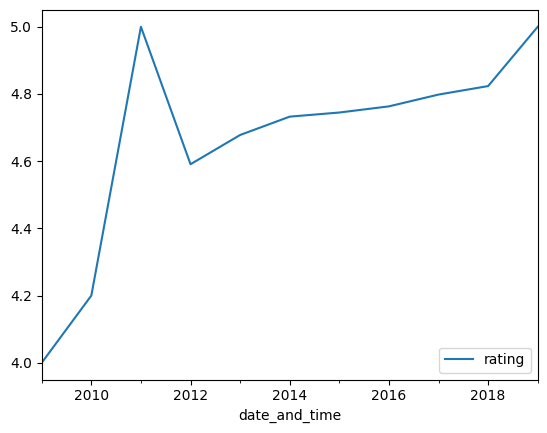

In [ ]:
# hacemos un plot
df_datetime.resample('BA').mean().plot()